  category   count
0    cs.LO   16578
1    cs.CR   35724
2    cs.NI   23067
3    cs.AI  105615
4    cs.PL    8115


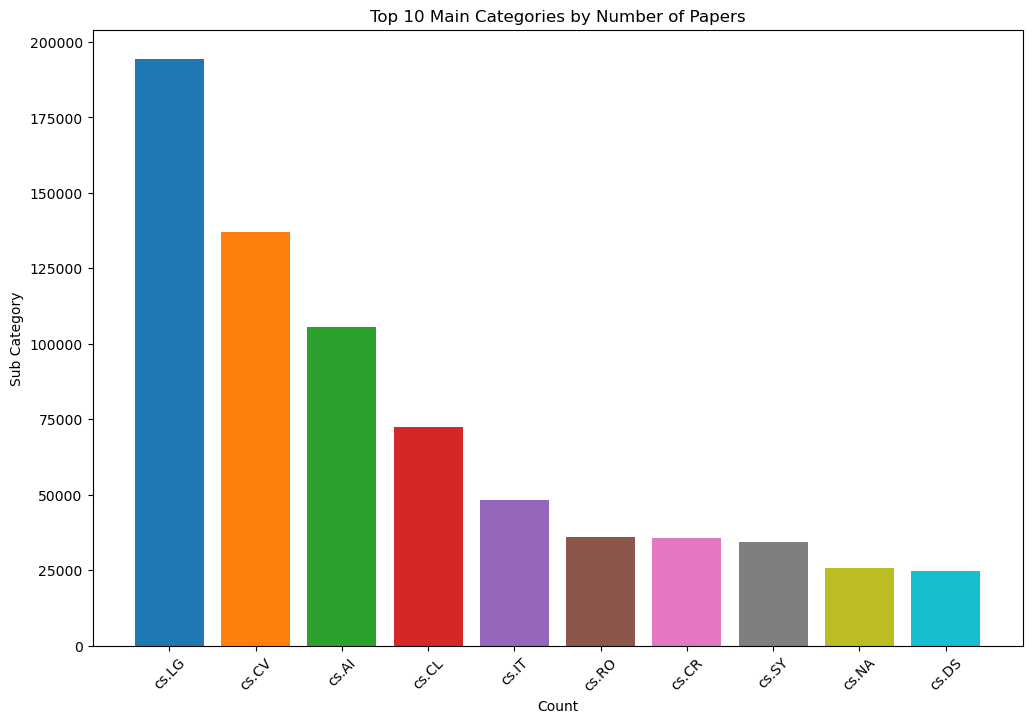

In [ ]:
import json
from matplotlib import pyplot as plt
import pandas as pd


with open('../spark_output/cs_category_count.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]
df = pd.DataFrame(data)

print(df.head())

top_10_df = df.nlargest(10, 'count')

plt.figure(figsize=(12, 8))
colors = plt.cm.tab10(range(10))
plt.bar(top_10_df['category'], top_10_df['count'], color=colors)
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.title('Top 10 Main Categories by Number of Papers')
plt.xticks(rotation=45)
plt.show()

/var/folders/vc/xr3_j3fd4fs4rq8tkll3czl00000gn/T/ipykernel_7922/2897385318.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['category'] = pd.Categorical(filtered_df['category'], categories=top_categories, ordered=True)


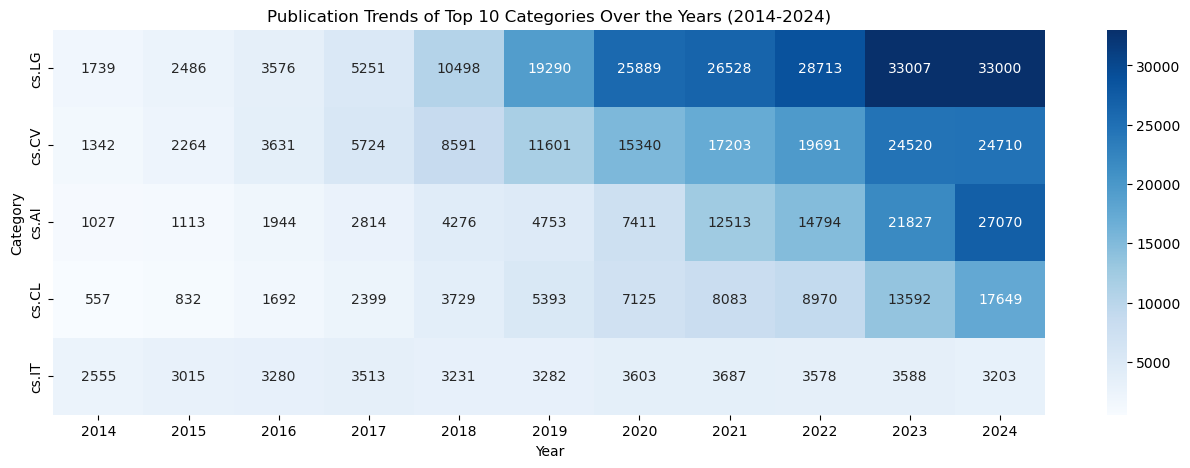

In [24]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


with open('../spark_output/cs_category_count.json', 'r', encoding='utf-8') as file:
    cs_category_data = [json.loads(line) for line in file]
cs_category_df = pd.DataFrame(cs_category_data)
# Find the top 10 categories
top_categories = cs_category_df.groupby('category')['count'].sum().nlargest(5).index

with open('../spark_output/cs_category_yearly_count.json', 'r', encoding='utf-8') as file:
    yearly_data = [json.loads(line) for line in file]
# Create a DataFrame from the yearly data
yearly_df = pd.DataFrame(yearly_data)

# Convert 'year' column to integer for correct plotting
yearly_df['year'] = yearly_df['year'].astype(int)

# Filter the DataFrame to include only the top 10 categories and the years 2004-2024
filtered_df = yearly_df[(yearly_df['category'].isin(top_categories)) & (yearly_df['year'].between(2014, 2024))]

# Ensure the order of categories in the heatmap matches the ranking order
filtered_df['category'] = pd.Categorical(filtered_df['category'], categories=top_categories, ordered=True)

# Pivot the DataFrame for heatmap plotting
heatmap_data = filtered_df.pivot(index="category", columns="year", values="count")

# Plot the heatmap
plt.figure(figsize=(16, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues")
plt.title('Publication Trends of Top 10 Categories Over the Years (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Category')
plt.show()
